In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
%matplotlib inline

In [2]:
path="C:/Users/HP/Documents/PARVIN PYTHON/jupyter/"
traindata=pd.read_csv(path+"train.csv")

In [3]:
print(traindata)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [4]:
print(traindata.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [5]:
print(traindata.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [6]:
print(traindata.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [7]:
print(traindata.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


**Handling missing values**

In [8]:
#'survived' is our target column
print(traindata.Survived.value_counts())

0    549
1    342
Name: Survived, dtype: int64


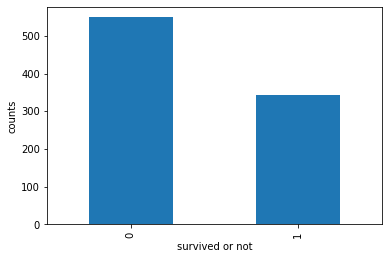

In [9]:
plot1=traindata.Survived.value_counts().plot.bar()
plot1.set_xlabel("survived or not")
plot1.set_ylabel("counts")
plt.show()

In [10]:
print(traindata.Pclass.value_counts())

3    491
1    216
2    184
Name: Pclass, dtype: int64


In [11]:
print(traindata.Pclass.value_counts().sort_index())

1    216
2    184
3    491
Name: Pclass, dtype: int64


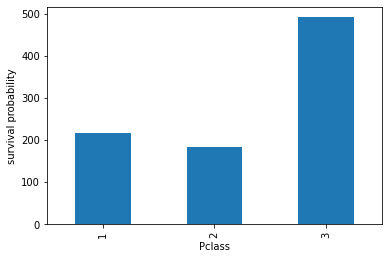

In [12]:
plot1=traindata.Pclass.value_counts().sort_index().plot.bar()
plot1.set_xlabel("Pclass")
plot1.set_ylabel("survival probability")
plt.show()

In [13]:
traindata[['Pclass','Survived']].groupby('Pclass').count()

,Survived
Pclass,
1,216
2,184
3,491


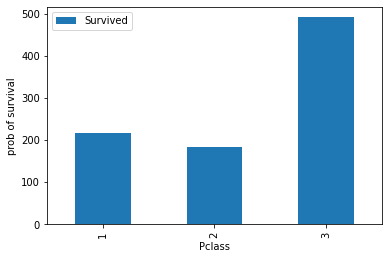

In [14]:
prob_of_survival=traindata[['Pclass','Survived']].groupby('Pclass').count().plot.bar()
prob_of_survival.set_xlabel("Pclass")
prob_of_survival.set_ylabel("prob of survival")
plt.show()

In [15]:
print(traindata[['Pclass','Survived']].groupby('Pclass').sum())

        Survived
Pclass          
1            136
2             87
3            119


majority of people are in 3rd class

In [16]:
print(traindata[['Pclass','Survived']].groupby('Pclass').mean())

        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


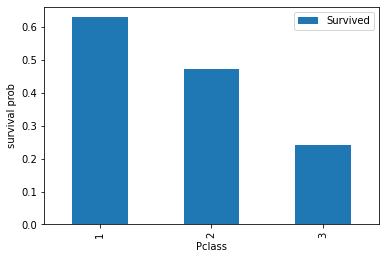

In [17]:
prob=traindata[['Pclass','Survived']].groupby('Pclass').mean().plot.bar()
prob.set_ylabel('survival prob')
plt.show()

thus, the above graph states that the people in 1st class have high chance of living

next,to find which gender has high prob of living

male      577
female    314
Name: Sex, dtype: int64


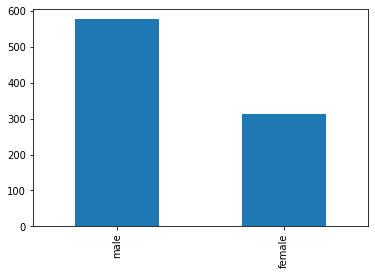

In [18]:
print(traindata['Sex'].value_counts())
traindata.Sex.value_counts().plot.bar()
plt.show()

        Survived
Sex             
female       314
male         577


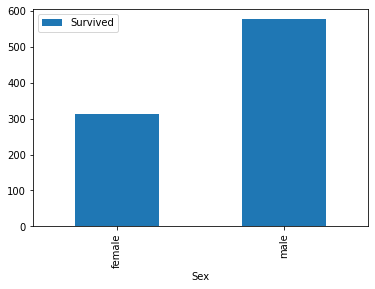

In [19]:
print(traindata[['Sex','Survived']].groupby('Sex').count())
traindata[['Sex','Survived']].groupby('Sex').count().plot.bar()
plt.show()

<AxesSubplot:xlabel='Sex'>

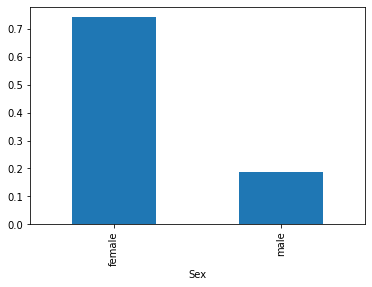

In [20]:
#prob of survival
traindata[['Sex','Survived']].groupby('Sex').mean().Survived.plot.bar()

thus,from the above graph,we can tell that female has high chance of living

next,to find people embarked in which city have high chance of survival

In [21]:
print(traindata[['Embarked','Survived']].value_counts())

Embarked  Survived
S         0           427
          1           217
C         1            93
          0            75
Q         0            47
          1            30
dtype: int64


          Survived
Embarked          
C              168
Q               77
S              644


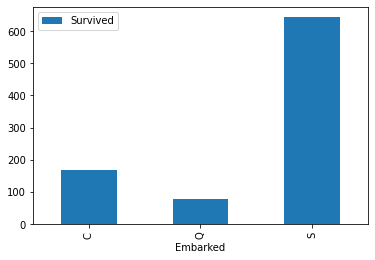

In [22]:
print(traindata[['Embarked','Survived']].groupby('Embarked').count())
traindata[['Embarked','Survived']].groupby('Embarked').count().plot.bar()
plt.show()

Text(0, 0.5, 'survival prob')

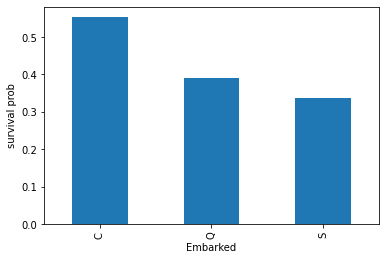

In [23]:
prob=traindata[['Embarked','Survived']].groupby('Embarked').mean().Survived.plot.bar()
prob.set_ylabel('survival prob')

most of the people are from SouthAmpton(S),but the prob of chance of living is C>Q>S

next,prob of chances of living for people with sibling/spouse(SibSp)

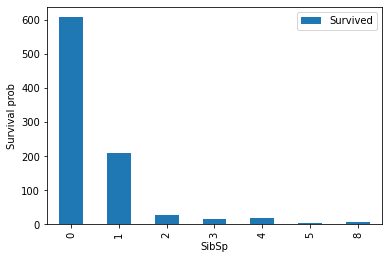

In [24]:
prob=traindata[['SibSp','Survived']].groupby('SibSp').count().plot.bar()
prob.set_ylabel('Survival prob')
plt.show()

thus,most people dont have siblings or spouse

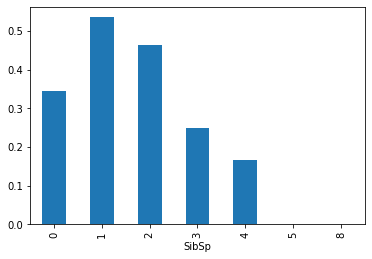

In [25]:
prob=traindata[['SibSp','Survived']].groupby('SibSp').mean().Survived.plot.bar()
plt.show()

thus survival prob is 1>2>0>3>4

next,prob of people with parents and children(Parch)

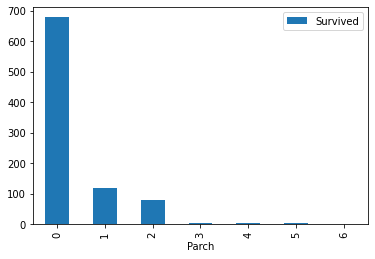

In [26]:
prob=traindata[['Parch','Survived']].groupby('Parch').count().plot.bar()
plt.show()

thus,most people neither have parents nor children

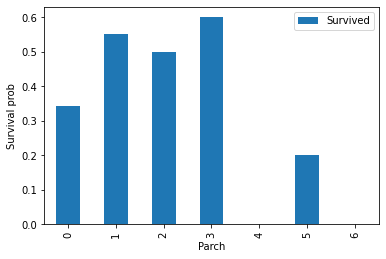

In [27]:
prob=traindata[['Parch','Survived']].groupby('Parch').mean().plot.bar()
prob.set_ylabel('Survival prob')
plt.show()

thus,prob of chance of living ranges as 3>1>2>0>5

Pclass Vs Embarked

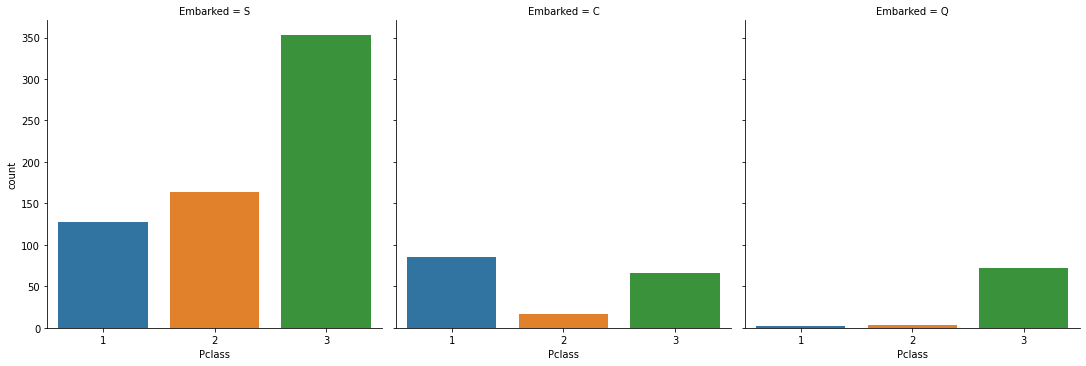

In [28]:
sns.factorplot('Pclass',col='Embarked',data=traindata,kind='count')
plt.show()

Pclass Vs Sex

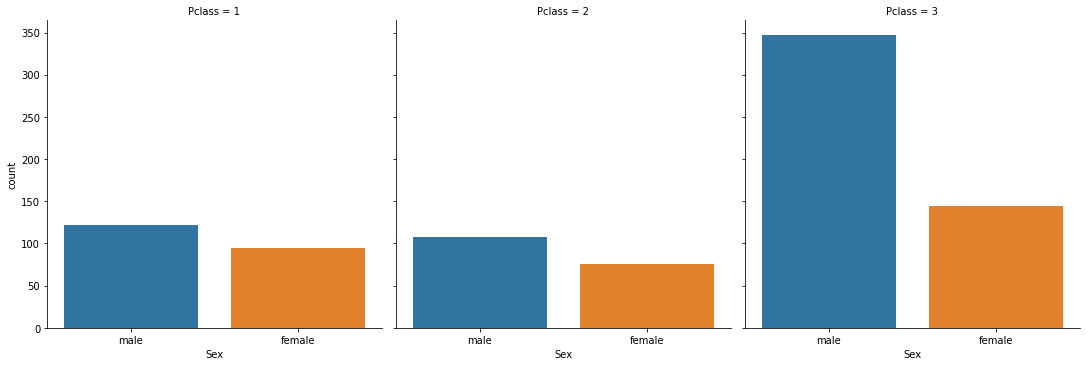

In [29]:
sns.factorplot('Sex',col='Pclass',data=traindata,kind='count')
plt.show()

Sex Vs Embaked

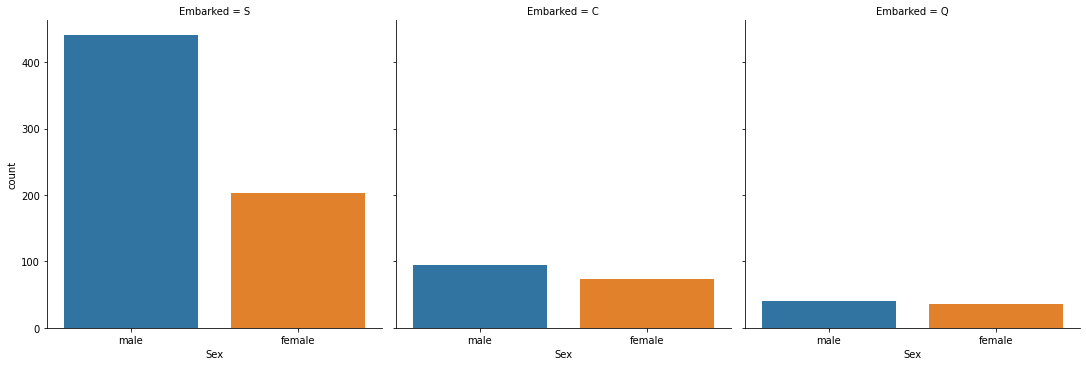

In [30]:
sns.factorplot('Sex',col='Embarked',data=traindata,kind='count')
plt.show()

Next,create a new col 'FamilySize'

In [31]:
traindata['FamilySize']=traindata['SibSp']+traindata['Parch']+1
print(traindata)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

Next,remove unnecessary columns

In [32]:
traindata=traindata.drop(columns=['PassengerId','Ticket','Cabin'])
print(traindata)

     Survived  Pclass                                               Name  \
0           0       3                            Braund, Mr. Owen Harris   
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2           1       3                             Heikkinen, Miss. Laina   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4           0       3                           Allen, Mr. William Henry   
..        ...     ...                                                ...   
886         0       2                              Montvila, Rev. Juozas   
887         1       1                       Graham, Miss. Margaret Edith   
888         0       3           Johnston, Miss. Catherine Helen "Carrie"   
889         1       1                              Behr, Mr. Karl Howell   
890         0       3                                Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch     Fare Embarked  FamilySize  
0      male  22.0      

map Sex and Embarked columns with numerical values

In [33]:
traindata['Sex']=traindata['Sex'].map({'male':0,'female':1})
traindata['Embarked']=traindata['Embarked'].map({'C':0,'Q':1,'S':2})
print(traindata)

     Survived  Pclass                                               Name  Sex  \
0           0       3                            Braund, Mr. Owen Harris    0   
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1   
2           1       3                             Heikkinen, Miss. Laina    1   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1   
4           0       3                           Allen, Mr. William Henry    0   
..        ...     ...                                                ...  ...   
886         0       2                              Montvila, Rev. Juozas    0   
887         1       1                       Graham, Miss. Margaret Edith    1   
888         0       3           Johnston, Miss. Catherine Helen "Carrie"    1   
889         1       1                              Behr, Mr. Karl Howell    0   
890         0       3                                Dooley, Mr. Patrick    0   

      Age  SibSp  Parch    

Extract names into a new col 'Title',group them, and drop 'names' column

In [34]:
print(traindata)

     Survived  Pclass                                               Name  Sex  \
0           0       3                            Braund, Mr. Owen Harris    0   
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1   
2           1       3                             Heikkinen, Miss. Laina    1   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1   
4           0       3                           Allen, Mr. William Henry    0   
..        ...     ...                                                ...  ...   
886         0       2                              Montvila, Rev. Juozas    0   
887         1       1                       Graham, Miss. Margaret Edith    1   
888         0       3           Johnston, Miss. Catherine Helen "Carrie"    1   
889         1       1                              Behr, Mr. Karl Howell    0   
890         0       3                                Dooley, Mr. Patrick    0   

      Age  SibSp  Parch    

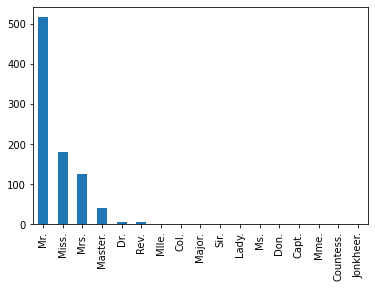

In [35]:
traindata['Title']=traindata['Name'].str.extract('([A-Za-z]+\.)')
traindata['Title'].value_counts().plot.bar()
plt.show()

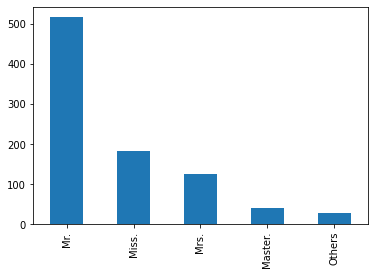

In [36]:
traindata['Title']=traindata['Title'].replace(['Dr.','Rev.','Major.','Mlle.','Col.','Lady.','Countess.','Ms.','Mme.','Jonkheer.','Don.','Sir.','Capt.'],'Others')
traindata["Title"].value_counts().plot.bar()
plt.show()

Text(0, 0.5, 'Survival prob')

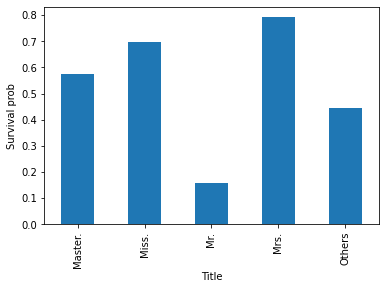

In [37]:
prob=traindata[['Title','Survived']].groupby('Title').mean().Survived.plot.bar()
prob.set_ylabel('Survival prob')

thus,probability of Miss and Mrs is high compared to other people

Next,map 'Title' to numeric values

In [38]:
traindata['Title']=traindata['Title'].map({'Master.':0,'Miss.':1,'Mr.':2,'Mrs.':3,'Others':4})
print(traindata)

     Survived  Pclass                                               Name  Sex  \
0           0       3                            Braund, Mr. Owen Harris    0   
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1   
2           1       3                             Heikkinen, Miss. Laina    1   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1   
4           0       3                           Allen, Mr. William Henry    0   
..        ...     ...                                                ...  ...   
886         0       2                              Montvila, Rev. Juozas    0   
887         1       1                       Graham, Miss. Margaret Edith    1   
888         0       3           Johnston, Miss. Catherine Helen "Carrie"    1   
889         1       1                              Behr, Mr. Karl Howell    0   
890         0       3                                Dooley, Mr. Patrick    0   

      Age  SibSp  Parch    

In [39]:
traindata=traindata.drop(columns='Name')

In [40]:
print(traindata)

     Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  FamilySize  \
0           0       3    0  22.0      1      0   7.2500       2.0           2   
1           1       1    1  38.0      1      0  71.2833       0.0           2   
2           1       3    1  26.0      0      0   7.9250       2.0           1   
3           1       1    1  35.0      1      0  53.1000       2.0           2   
4           0       3    0  35.0      0      0   8.0500       2.0           1   
..        ...     ...  ...   ...    ...    ...      ...       ...         ...   
886         0       2    0  27.0      0      0  13.0000       2.0           1   
887         1       1    1  19.0      0      0  30.0000       2.0           1   
888         0       3    1   NaN      1      2  23.4500       2.0           4   
889         1       1    0  26.0      0      0  30.0000       0.0           1   
890         0       3    0  32.0      0      0   7.7500       1.0           1   

     Title  
0        2  
1

Next,find correlation

In [41]:
corr_matrix=traindata.corr()

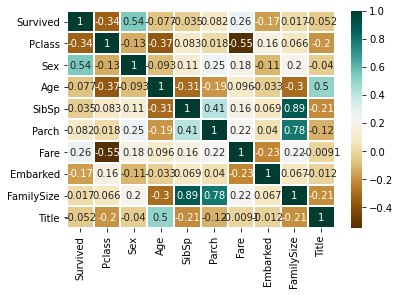

In [42]:
sns.heatmap(data=corr_matrix,cmap='BrBG',annot=True,linewidths=0.2)
plt.show()

There are no very high correlated item
##### Next,Handling missing values

In [43]:
print(traindata.isnull().sum())

Survived        0
Pclass          0
Sex             0
Age           177
SibSp           0
Parch           0
Fare            0
Embarked        2
FamilySize      0
Title           0
dtype: int64


Let us fill null in 'Embarked' with the majority value.
Majority is 'S' with given value 2

In [44]:
traindata['Embarked']=traindata['Embarked'].fillna(2)
print(traindata['Embarked'].isnull().sum())

0


Next,Handling missing values of Age column.

We have to find what are the columns related to Age col.

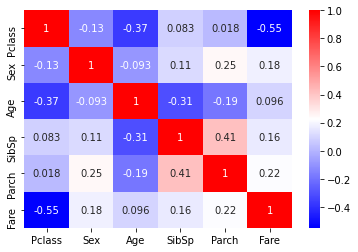

In [45]:
age_corr=traindata[['Pclass','Sex','Age','SibSp','Parch','Fare']].corr()
age_corr
sns.heatmap(data=age_corr,cmap='bwr',annot=True)
plt.show()

Thus,Parch,SibSp & Pclass are more correlated with Age.

So, let us fill missing values of Age with median of these columns with similar values

In [46]:
nan_indices=traindata['Age'][traindata['Age'].isnull()].index

In [47]:
print(nan_indices)

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)


In [48]:
for i in nan_indices:
    pred_age=traindata['Age'][((traindata['SibSp']==traindata.iloc[i]['SibSp']) & (traindata['Parch']==traindata.iloc[i]['Parch']) & (traindata['Pclass']==traindata.iloc[i]['Pclass']))].median()
    if np.isnan(pred_age):
        traindata["Age"].iloc[i]=traindata['Age'].median()
    else:
        traindata['Age'].iloc[i]=pred_age

In [49]:
print(traindata.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
FamilySize    0
Title         0
dtype: int64


We have nullified all the null values in the dataset.

In [50]:
print(traindata)

     Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  FamilySize  \
0           0       3    0  22.0      1      0   7.2500       2.0           2   
1           1       1    1  38.0      1      0  71.2833       0.0           2   
2           1       3    1  26.0      0      0   7.9250       2.0           1   
3           1       1    1  35.0      1      0  53.1000       2.0           2   
4           0       3    0  35.0      0      0   8.0500       2.0           1   
..        ...     ...  ...   ...    ...    ...      ...       ...         ...   
886         0       2    0  27.0      0      0  13.0000       2.0           1   
887         1       1    1  19.0      0      0  30.0000       2.0           1   
888         0       3    1  13.5      1      2  23.4500       2.0           4   
889         1       1    0  26.0      0      0  30.0000       0.0           1   
890         0       3    0  32.0      0      0   7.7500       1.0           1   

     Title  
0        2  
1

##### preprocessed traindata is ready

Let us split the traindata into training data and validation data

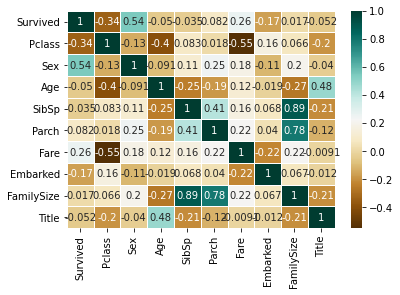

In [51]:
# plt.figure(figsize=(7,6))
sns.heatmap(traindata.corr(),cmap='BrBG',annot=True,linewidths=0.5)
plt.show()

Since, columns 'Sex','Pclass','Fare' & 'Embarked' have reasonable correlation with Survived,let us consider only these 4 features for our model

Here,We select Logistic Regression to build our model,since our target column 'Survived' has categoral values

In [52]:
x=traindata.iloc[:,1:]

In [53]:
print(x)

     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  FamilySize  Title
0         3    0  22.0      1      0   7.2500       2.0           2      2
1         1    1  38.0      1      0  71.2833       0.0           2      3
2         3    1  26.0      0      0   7.9250       2.0           1      1
3         1    1  35.0      1      0  53.1000       2.0           2      3
4         3    0  35.0      0      0   8.0500       2.0           1      2
..      ...  ...   ...    ...    ...      ...       ...         ...    ...
886       2    0  27.0      0      0  13.0000       2.0           1      4
887       1    1  19.0      0      0  30.0000       2.0           1      1
888       3    1  13.5      1      2  23.4500       2.0           4      1
889       1    0  26.0      0      0  30.0000       0.0           1      2
890       3    0  32.0      0      0   7.7500       1.0           1      2

[891 rows x 9 columns]


In [54]:
y=traindata.loc[:,'Survived']
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [55]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=12)

In [56]:
xtest.shape

(268, 9)

**Building the model**


In [57]:
log_reg=LogisticRegression(penalty='l2',solver='lbfgs',multi_class='multinomial',C=0.4).fit(xtrain,ytrain)

In [58]:
print(log_reg.coef_)

[[-5.20310126e-01  1.30858189e+00 -1.36302505e-02 -3.68378564e-01
  -1.95970251e-01  1.08348360e-03 -6.11253238e-02  2.14592163e-01
  -1.04329844e-01]]


In [59]:
print(log_reg.intercept_)

[0.9187641]


In [60]:
ypred=log_reg.predict(xtest)
print(ypred)

[0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0
 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1
 1 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1
 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 1
 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 1 0 1 0 0 0 0 1]


In [61]:
print(log_reg.predict_proba(xtest))

[[0.75953429 0.24046571]
 [0.60094732 0.39905268]
 [0.88817823 0.11182177]
 [0.61673066 0.38326934]
 [0.88801941 0.11198059]
 [0.74428233 0.25571767]
 [0.35059106 0.64940894]
 [0.4452755  0.5547245 ]
 [0.82465481 0.17534519]
 [0.79108399 0.20891601]
 [0.9233427  0.0766573 ]
 [0.89613082 0.10386918]
 [0.848783   0.151217  ]
 [0.5360067  0.4639933 ]
 [0.2695827  0.7304173 ]
 [0.84094446 0.15905554]
 [0.81925936 0.18074064]
 [0.78841701 0.21158299]
 [0.88841242 0.11158758]
 [0.90102199 0.09897801]
 [0.60565374 0.39434626]
 [0.74017596 0.25982404]
 [0.93696683 0.06303317]
 [0.50613009 0.49386991]
 [0.38206351 0.61793649]
 [0.60328347 0.39671653]
 [0.29403535 0.70596465]
 [0.52380478 0.47619522]
 [0.90760632 0.09239368]
 [0.1386974  0.8613026 ]
 [0.92097341 0.07902659]
 [0.88696406 0.11303594]
 [0.32319525 0.67680475]
 [0.91030297 0.08969703]
 [0.88767961 0.11232039]
 [0.1909498  0.8090502 ]
 [0.89861268 0.10138732]
 [0.91145016 0.08854984]
 [0.74557879 0.25442121]
 [0.32607933 0.67392067]


**Evaluating our model**

In [62]:
confusion_mat=confusion_matrix(ytest,ypred)

In [63]:
print(confusion_mat)

[[141  20]
 [ 37  70]]


In [64]:
class_report=classification_report(ytest,ypred)

In [65]:
print(class_report)

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       161
           1       0.78      0.65      0.71       107

    accuracy                           0.79       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.79      0.79      0.78       268

